# Preparing Model - implementing Backpropagation by own

# imports

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = './../Data/cifar/cifar-10/'
Xtr = np.load(data_folder + 'Xtr.npy')
ytr = np.load(data_folder + 'ytr.npy')
Xte = np.load(data_folder + 'Xte.npy')
yte = np.load(data_folder + 'yte.npy')
labels = read_dictionary = np.load(data_folder + 'labels_dict.npy',allow_pickle='TRUE').item()
true_shape = (32, 32, 3)
Xtr.shape , ytr.shape , Xte.shape , yte.shape , labels

((50000, 3072),
 (50000,),
 (10000, 3072),
 (10000,),
 {0: 'jetliner',
  1: 'shooting',
  2: 'gamecock',
  3: 'domestic',
  4: 'wapiti',
  5: 'toy',
  6: 'green',
  7: 'lippizan',
  8: 'hydrofoil',
  9: 'dustcart'})

jetliner


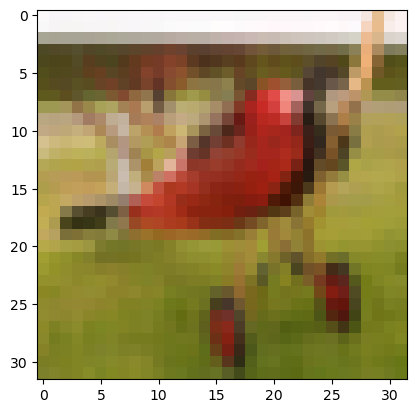

In [50]:
idx = 35
plt.imshow(Xtr[idx].reshape(3, 32, 32).transpose(1,2, 0))
print(labels[ytr[idx]])

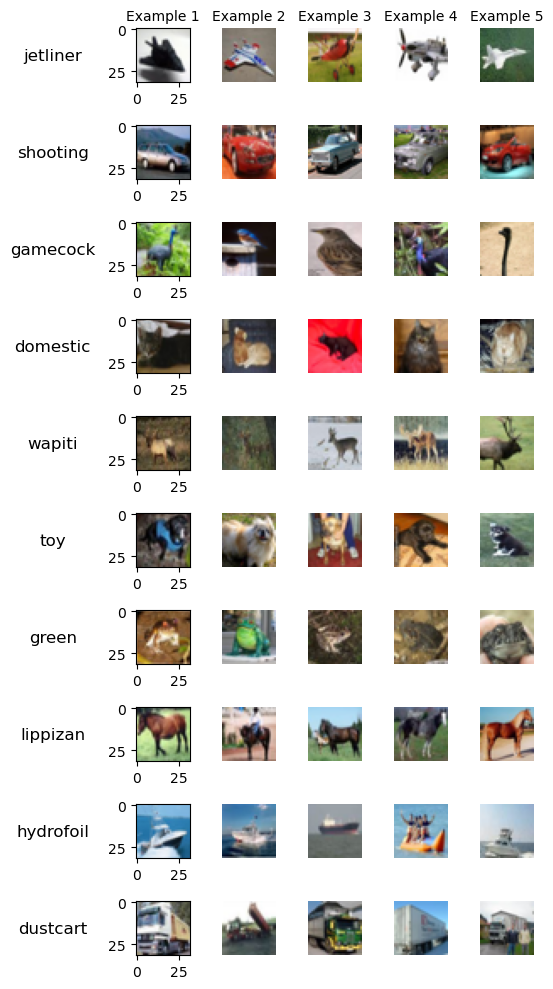

In [62]:
def grid_images(X, y, labels, n_examples=10):
    plt.figure(figsize=(10,10))
    for label in labels.keys():
        for example in range(n_examples):
            plt.subplot(10, 10, label * 10 + example + 1)
            plt.imshow(X[y == label][example].reshape(3, 32, 32).transpose(1, 2, 0))
            if label == 0:
                plt.title(f'Example {example + 1}', fontsize=10)
            if example == 0:
                plt.ylabel(labels[label], rotation=0, labelpad=40, fontsize=12, va='center')
            else:
                plt.axis('off')  

    plt.tight_layout()
    plt.show()

grid_images(Xtr, ytr, labels , 5)

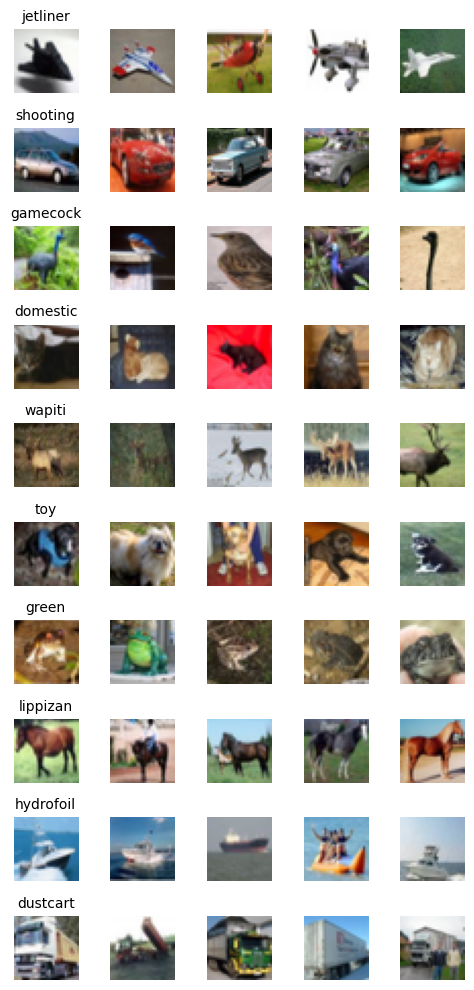

In [56]:
def grid_images(X, y, labels, examples_per_class = 10):
    num_classes = len(labels) 
    fig ,axs = plt.subplots(num_classes, examples_per_class, figsize=(examples_per_class, num_classes)) 
    for i in range(num_classes):
        for j in range(examples_per_class):
            idx = np.where(y == i)[0][j]
            axs[i, j].imshow(X[idx].reshape(3, 32, 32).transpose(1, 2, 0))
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(labels[i], fontsize=10)
            if i == 0:
                plt.ylabel(labels[i], rotation=0, labelpad=40, fontsize=12, va='center')
    plt.tight_layout()
    plt.show()
    
grid_images(Xtr, ytr, labels, 5)

# Model

In [159]:
Xtr.shape

(50000, 3072)

In [160]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def d_sigmoid(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def d_softmax(x):
    return x * (1 - x) 

### Create Network (Simple MLP)

In [161]:
h1_neurons =  Xtr.shape[1] // 16
W1 = np.random.rand(Xtr.shape[1], h1_neurons )
b1 = np.random.rand(1,h1_neurons)

h2_neurons =  h1_neurons // 8
W2 = np.random.rand(h1_neurons, h2_neurons)
b2 = np.random.rand(1,h2_neurons)

output_neurons = 10
W3 = np.random.rand(h2_neurons, output_neurons)
b3 = np.random.rand(1,output_neurons)

W1.shape, b1.shape, W2.shape, b2.shape, W3.shape, b3.shape 

((3072, 192), (1, 192), (192, 24), (1, 24), (24, 10), (1, 10))

In [162]:
parameters = [W1, b1, W2, b2, W3, b3]
params_size = sum([W1.size, b1.size, W2.size, b2.size, W3.size, b3.size])
params_size

594898

### Forward the network

> Using Only 1 train element for dev purpose

In [163]:
def forward(Xtr, W1, b1, W2, b2, W3, b3):
    h1 = np.dot(Xtr, W1) + b1
    a1 = sigmoid(h1)

    h2 = np.dot(a1, W2) + b2
    a2 = sigmoid(h2)

    h3 = np.dot(a2, W3) + b3
    a3 = softmax(h3)

    return h1, a1, h2, a2, h3, a3

h1, a1, h2, a2, h3, a3 = forward(Xtr[:1], W1, b1, W2, b2, W3, b3)
a3.shape 
a3
y_pred = np.argmax(a3, axis=1)
y_pred.shape
print(f'Pred : {y_pred[0]}, Actual : {ytr[0]}')

(1, 10)

array([[0.00610713, 0.0150346 , 0.02816597, 0.02796344, 0.03989168,
        0.3163817 , 0.035682  , 0.02532973, 0.36787585, 0.13756791]])

(1,)

Pred : 8, Actual : 6


In [164]:
loss = -np.log(a3[0][ytr[0]])
print(f'{loss = }')

loss = 3.3331090215740815


#### One Hot Encoding of labels 

In [165]:
def create_e(y):
    e = np.zeros((y.size, 10))
    e[np.arange(y.size), y] = 1
    return e
e = create_e(ytr[0])
e,ytr[0]

(array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]), 6)

### Calculate the Gradients of all parameters

In [166]:
a3.shape, e.shape

((1, 10), (1, 10))

In [167]:
dh3 = a3 - e 
dh3

array([[ 0.00610713,  0.0150346 ,  0.02816597,  0.02796344,  0.03989168,
         0.3163817 , -0.964318  ,  0.02532973,  0.36787585,  0.13756791]])

In [168]:
a2.shape, dh3.shape, W3.shape , b3.shape

((1, 24), (1, 10), (24, 10), (1, 10))

In [169]:
dW3 = a2.T @ dh3 
db3 = dh3
dW3.shape , db3.shape

((24, 10), (1, 10))

In [170]:
W3.shape, dh3.shape

((24, 10), (1, 10))

In [171]:
W2.shape, b2.shape

((192, 24), (1, 24))

In [172]:
da2 = dh3 @ W3.T
dh2 = a2 * (1-a2) * da2
dW2 = a1.T @ dh2 
db2 = dh2 
dW2.shape, db2.shape

((192, 24), (1, 24))

In [173]:
W1.shape, b1.shape

((3072, 192), (1, 192))

In [174]:
da1 = dh2 @ W2.T
dh1 = a1 * (1-a1) * da1
dW1 = Xtr[:1].T @ dh1 
db1 = dh1 
dW1.shape, db1.shape

((3072, 192), (1, 192))

### Updating (decrease/descent) the parameters with Gradient 

In [175]:
# updating 
parameters = [W1, b1, W2, b2, W3, b3]
updates = [dW1, db1, dW2, db2, dW3, db3]

lr = 0.1

for idx in range(len(parameters)):
    parameters[idx] -= lr * updates[idx]

* Again forward to see if there is any change ?

In [176]:
h1, a1, h2, a2, h3, a3 = forward(Xtr[:1], W1, b1, W2, b2, W3, b3)
a3.shape 
a3
y_pred = np.argmax(a3, axis=1)
y_pred.shape
print(f'Pred : {y_pred[0]}, Actual : {ytr[0]}')
loss = -np.log(a3[0][ytr[0]])
print(f'{loss = }')

(1, 10)

array([[0.00655231, 0.01577452, 0.02859774, 0.02840649, 0.03933311,
        0.15627595, 0.43314368, 0.02590103, 0.15976183, 0.10625333]])

(1,)

Pred : 6, Actual : 6
loss = 0.8366857752271667


There is significant reduce in loss $\implies$ we are on right track

### Backward as a function

In [177]:
def backward(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e):
    dh3 = a3 - e 
    dW3 = a2.T @ dh3 
    db3 = dh3

    da2 = dh3 @ W3.T
    dh2 = a2 * (1-a2) * da2
    dW2 = a1.T @ dh2 
    db2 = dh2 

    da1 = dh2 @ W2.T
    dh1 = a1 * (1-a1) * da1
    dW1 = Xtr[:1].T @ dh1 
    db1 = dh1 

    updates = [dW1, db1, dW2, db2, dW3, db3]
    return updates 


In [178]:
updates = backward(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e)
for idx in range(len(parameters)):
    parameters[idx] -= lr * updates[idx]
h1, a1, h2, a2, h3, a3 = forward(Xtr[:1], W1, b1, W2, b2, W3, b3)
y_pred = np.argmax(a3, axis=1)
print(f'Pred : {y_pred[0]}, Actual : {ytr[0]}')
loss = -np.log(a3[0][ytr[0]])
print(f'{loss = }')

Pred : 6, Actual : 6
loss = 0.21517135354154351


### Repeat(forward - backward - update) : ie Gradient Descent 

In [179]:
def gradient_descent(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e,lr = 0.1):
    updates = backward(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e)
    for idx in range(len(parameters)):
        parameters[idx] -= lr * updates[idx]
    h1, a1, h2, a2, h3, a3 = forward(Xtr[:1], W1, b1, W2, b2, W3, b3)
    y_pred = np.argmax(a3, axis=1)
    print(f'Pred : {y_pred[0]}, Actual : {ytr[0]}')
    loss = -np.log(a3[0][ytr[0]])
    print(f'{loss = }')
gradient_descent(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e)

Pred : 6, Actual : 6
loss = 0.12736243729537813


In [180]:
gradient_descent(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e)

Pred : 6, Actual : 6
loss = 0.07415622370126886


In [181]:
gradient_descent(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e)

Pred : 6, Actual : 6
loss = 0.04276787332497724


In [182]:
gradient_descent(h1, a1, h2, a2, h3, a3 ,W1, b1, W2, b2, W3, b3 ,e)

Pred : 6, Actual : 6
loss = 0.024543029677239675


## Putting All Together

In [298]:
class MLPNetwork:
    def __init__(self , n_input, n_output):
        self.n_input = n_input

        self.h1_neurons =  self.n_input // 16 
        self.W1 = np.random.rand(self.n_input, self.h1_neurons)
        self.b1 = np.random.rand(1,self.h1_neurons)

        self.h2_neurons =  self.h1_neurons // 4 
        self.W2 = np.random.rand(self.h1_neurons, self.h2_neurons)
        self.b2 = np.random.rand(1,self.h2_neurons)

        self.n_output = n_output
        self.W3 = np.random.rand(self.h2_neurons, self.n_output)
        self.b3 = np.random.rand(1,self.n_output)

        self.parameters = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]
        self.n_parameters = sum([self.W1.size, self.b1.size, self.W2.size, self.b2.size, self.W3.size, self.b3.size])

    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x)) 
    
    def d_sigmoid(self, x):
        return x * (1 - x)
    
    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def d_softmax(self, x):
        return x * (1 - x)

    def create_e(self, y): 
        e = np.zeros((y.size, self.n_output))
        e[np.arange(y.size), y] = 1
        return e
    
    def forward(self, X): 
        self.h1 = X @ self.W1 + self.b1 
        self.a1 = self.sigmoid(self.h1)

        self.h2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.h2)

        self.h3 = self.a2 @ self.W3 + self.b3
        self.a3 = self.softmax(self.h3)

        return self.a3
    
    def backward(self,X):
        self.dh3 = (self.a3 - self.e) / self.e.shape[0]
        self.dW3 = self.a2.T @ self.dh3 
        self.db3 = np.ones((1,self.a2.shape[0])) @ self.dh3

        self.da2 = self.dh3 @ self.W3.T
        self.dh2 = self.a2 * (1-self.a2) * self.da2
        self.dW2 = self.a1.T @ self.dh2 
        self.db2 = np.ones((1,self.a1.shape[0])) @ self.dh2

        self.da1 = self.dh2 @ self.W2.T
        self.dh1 = self.a1 * (1-self.a1) * self.da1
        self.dW1 = X.T @ self.dh1 
        self.db1 = np.ones((1,X.shape[0])) @ self.dh1

        self.updates = [self.dW1, self.db1, self.dW2, self.db2, self.dW3, self.db3]
        return self.updates

    def loss(self):
        return - np.sum(self.e * np.log(self.a3)) / self.e.shape[0]
    
    def fit(self, X, y):
        lr = 1e-2
        self.e = self.create_e(y)
        self.forward(X)
        loss = self.loss()
        print(f'Initial Loss \t : {loss}')
        self.backward(X)
        for idx in range(len(self.parameters)):
            self.parameters[idx] -= lr * self.updates[idx] 
        self.forward(X)
        loss2 = self.loss()
        print(f'After Update Loss2 : {loss}')
        return loss2 - loss 

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1) 
    
    def gradient_descent(self, X, y, lr = 0.1, max_iters = 1000, losses = []):
        self.e = self.create_e(y)
        self.forward(X)
        loss = self.loss() 
        print(f'Initial Loss \t  : {loss}')
        losses.append(loss)
        for iter in range(max_iters):
            self.backward(X)
            for idx in range(len(self.parameters)):
                self.parameters[idx] -= lr * self.updates[idx] 
            self.forward(X)
            loss = self.loss()
            if iter % (max_iters//10) == 0:
                print(f'Iter : {iter:5}, Loss : {loss:.6f}') 
            losses.append(loss)
        return losses 

model = MLPNetwork(Xtr.shape[1], len(labels))
model.n_parameters , model.n_input , model.n_output

(599770, 3072, 10)

In [299]:
model.fit(Xtr[:1000], ytr[:1000])

Initial Loss 	 : 2.9379600946765225
After Update Loss2 : 2.9379600946765225


-0.050723858955010304

## Gradient descent on all TRAIN data

In [301]:
losses = model.gradient_descent(Xtr[:1000], ytr[:1000], lr = 1e-5)
f'mean : {np.mean(np.array(losses))}\n std : {np.std(np.array(losses))}'

Initial Loss 	  : 2.300038679031857
Iter :     0, Loss : 2.300039
Iter :   100, Loss : 2.300039
Iter :   200, Loss : 2.300039
Iter :   300, Loss : 2.300039
Iter :   400, Loss : 2.300039
Iter :   500, Loss : 2.300039
Iter :   600, Loss : 2.300039
Iter :   700, Loss : 2.300039
Iter :   800, Loss : 2.300039
Iter :   900, Loss : 2.300039


'mean : 2.305772915141512\n std : 0.0402065490706329'

In [302]:
losses = model.gradient_descent(Xtr[:1000], ytr[:1000], lr = 1e-3,losses = losses)
f'mean : {np.mean(np.array(losses)):.6f}\n std : {np.std(np.array(losses)):.6f}'

Initial Loss 	  : 2.300038679031857
Iter :     0, Loss : 2.300039
Iter :   100, Loss : 2.300039
Iter :   200, Loss : 2.300039
Iter :   300, Loss : 2.300039
Iter :   400, Loss : 2.300039
Iter :   500, Loss : 2.300039
Iter :   600, Loss : 2.300039
Iter :   700, Loss : 2.300039
Iter :   800, Loss : 2.300039
Iter :   900, Loss : 2.300039


'mean : 2.303600\n std : 0.031805'

In [303]:
losses = model.gradient_descent(Xtr[:1000], ytr[:1000], lr = 1e-4,losses = losses)
f'mean : {np.mean(np.array(losses)):.6f}\n std : {np.std(np.array(losses)):.6f}'

Initial Loss 	  : 2.3000386790318568
Iter :     0, Loss : 2.300039
Iter :   100, Loss : 2.300039
Iter :   200, Loss : 2.300039
Iter :   300, Loss : 2.300039
Iter :   400, Loss : 2.300039
Iter :   500, Loss : 2.300039
Iter :   600, Loss : 2.300039
Iter :   700, Loss : 2.300039
Iter :   800, Loss : 2.300039
Iter :   900, Loss : 2.300039


'mean : 2.302621\n std : 0.027131'

In [304]:
losses = model.gradient_descent(Xtr[:1000], ytr[:1000], lr = 1e-5,losses = losses)
f'mean : {np.mean(np.array(losses)):.6f}   std : {np.std(np.array(losses)):.6f}'

Initial Loss 	  : 2.300038679031857
Iter :     0, Loss : 2.300039
Iter :   100, Loss : 2.300039
Iter :   200, Loss : 2.300039
Iter :   300, Loss : 2.300039
Iter :   400, Loss : 2.300039
Iter :   500, Loss : 2.300039
Iter :   600, Loss : 2.300039
Iter :   700, Loss : 2.300039
Iter :   800, Loss : 2.300039
Iter :   900, Loss : 2.300039


'mean : 2.302064   std : 0.024052'

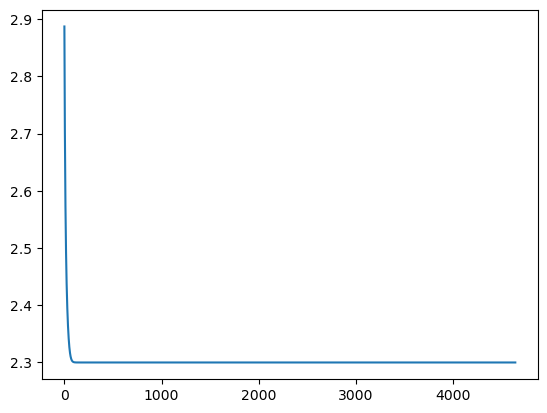

In [305]:
plt.plot(losses)

In [307]:
model.predict(Xtr[1000:1010]), ytr[1000:1010]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([9, 4, 3, 2, 4, 4, 1, 4, 2, 2]))